In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
pd.set_option('display.max_columns', 999)

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow_core.estimator import inputs
from tensorflow import feature_column
from tensorflow.keras import layers
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
def normalize_and_encode(dataframe):
    column_names_to_not_normalize = ['result']
    column_names_to_normalize = [x for x in list(dataframe) if x not in column_names_to_not_normalize ]
    x = dataframe[column_names_to_normalize].values
    x_scaled = preprocessing.normalize(x)
    df_temp = pd.DataFrame(x_scaled, columns=column_names_to_normalize, index = dataframe.index)
    dataframe[column_names_to_normalize] = df_temp

    le = preprocessing.LabelEncoder()
    le.fit([ "H", "A", "D"])
    dataframe.loc[:,['result']]=le.transform(dataframe['result'])
    
    return dataframe

def get_X_and_y(dataframe):
    X = dataframe.drop(columns=['result']).values
    y = dataframe[['result']].values
    return X,y

df01 = pd.read_csv('../data/sliding01.csv', sep=',', index_col=0)
df02 = pd.read_csv('../data/sliding02_shots.csv', sep=',', index_col=0)
df03 = pd.read_csv('../data/sliding03_shots_extra.csv', sep=',', index_col=0)
#df04 = pd.read_csv('../data/sliding04_shots_possesion', sep=',', index_col=0) # Possession not implemented yet

n01 = normalize_and_encode(df01)
n02 = normalize_and_encode(df02)
n03 = normalize_and_encode(df03)

train01, test01 = train_test_split(n01, test_size=0.1)
print(len(train01), 'train examples')
print(len(test01), 'test examples')

train02, test02 = train_test_split(n02, test_size=0.1)
print(len(train02), 'train examples')
print(len(test02), 'test examples')

train03, test03 = train_test_split(n03, test_size=0.1)
print(len(train03), 'train examples')
print(len(test03), 'test examples')


train_X01,train_y01 = get_X_and_y(train01)
train_X02,train_y02 = get_X_and_y(train02)
train_X03,train_y03 = get_X_and_y(train03)

test_X01,test_y01 = get_X_and_y(test01)
test_X02,test_y02 = get_X_and_y(test02)
test_X03,test_y03 = get_X_and_y(test03)

18740 train examples
2083 test examples
6329 train examples
704 test examples
6329 train examples
704 test examples


In [3]:
n01

,result,odds-home,odds-draw,odds-away,home-wins,home-draws,home-losses,home-goals,home-opposition-goals,away-wins,away-draws,away-losses,away-goals,away-opposition-goals
0,2,0.049957,0.165301,0.330601,0.183667,0.110200,0.073467,0.514268,0.367334,0.073467,0.073467,0.220401,0.293868,0.514268
1,1,0.077897,0.103862,0.121172,0.103862,0.138483,0.103862,0.553931,0.415448,0.138483,0.103862,0.103862,0.484690,0.415448
2,1,0.109311,0.117119,0.105407,0.195198,0.078079,0.117119,0.390396,0.312317,0.156158,0.156158,0.078079,0.585594,0.507514
3,0,0.068789,0.117049,0.155945,0.180075,0.108045,0.072030,0.648271,0.396166,0.108045,0.108045,0.144060,0.360151,0.396166
4,2,0.108097,0.154424,0.205899,0.102949,0.205899,0.205899,0.308848,0.463272,0.051475,0.308848,0.154424,0.360322,0.514746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20818,2,0.162536,0.123527,0.055262,0.097521,0.065014,0.162536,0.260057,0.487607,0.065014,0.130029,0.130029,0.325071,0.682650
20819,2,0.061498,0.110696,0.113771,0.092247,0.092247,0.122995,0.307489,0.584228,0.030749,0.122995,0.153744,0.215242,0.645726
20820,2,0.073697,0.153535,0.184242,0.122828,0.163770,0.122828,0.409426,0.368484,0.204713,0.081885,0.122828,0.614139,0.368484
20821,2,0.044350,0.175065,0.300111,0.066691,0.100037,0.166729,0.400149,0.466840,0.100037,0.100037,0.133383,0.366803,0.533532


In [4]:
n02

,result,odds-home,odds-draw,odds-away,home-wins,home-draws,home-losses,home-goals,home-opposition-goals,home-shots,home-shots_on_target,home-opposition_shots,home-opposition_shots_on_target,away-wins,away-draws,away-losses,away-goals,away-opposition-goals,away-shots,away-shots_on_target,away-opposition_shots,away-opposition_shots_on_target
0,2,0.012482,0.011769,0.007489,0.003566,0.010699,0.021398,0.039230,0.057061,0.488587,0.238944,0.417260,0.189015,0.028531,0.007133,0.000000,0.053495,0.021398,0.574178,0.278173,0.256775,0.106990
1,1,0.009236,0.012191,0.010640,0.011083,0.003694,0.022166,0.029555,0.059110,0.495044,0.236439,0.557848,0.284465,0.011083,0.011083,0.014777,0.040638,0.066498,0.384213,0.162552,0.321409,0.132997
2,0,0.007188,0.012795,0.015805,0.015053,0.007526,0.015053,0.037632,0.056448,0.451585,0.218266,0.466638,0.210740,0.007526,0.007526,0.022579,0.041395,0.056448,0.504270,0.222029,0.376321,0.173108
3,2,0.010289,0.010289,0.007281,0.015829,0.006332,0.009497,0.069647,0.037989,0.560339,0.259592,0.234266,0.117133,0.018995,0.009497,0.003166,0.060149,0.025326,0.535013,0.300747,0.357730,0.183614
4,2,0.004077,0.020384,0.064551,0.023782,0.006795,0.003397,0.050961,0.027179,0.546982,0.244613,0.251408,0.105320,0.010192,0.006795,0.016987,0.033974,0.057756,0.485829,0.234421,0.455252,0.234421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7028,2,0.020289,0.015420,0.006898,0.016231,0.008116,0.016231,0.040578,0.048694,0.324626,0.174487,0.474766,0.243470,0.008116,0.016231,0.016231,0.040578,0.085214,0.482881,0.235354,0.454477,0.263759
7029,2,0.009960,0.017929,0.018427,0.014941,0.009960,0.024901,0.044822,0.104584,0.443238,0.234070,0.458179,0.229089,0.004980,0.019921,0.024901,0.034861,0.104584,0.517941,0.273911,0.313753,0.129485
7030,2,0.007617,0.015870,0.019044,0.012696,0.012696,0.016928,0.033855,0.033855,0.516293,0.249683,0.389336,0.211596,0.021160,0.008464,0.012696,0.063479,0.038087,0.355481,0.181972,0.499366,0.236987
7031,2,0.005271,0.020806,0.035667,0.007926,0.011889,0.019815,0.047556,0.055483,0.491416,0.245708,0.392341,0.198152,0.011889,0.011889,0.015852,0.043593,0.067372,0.408193,0.210041,0.483490,0.214004


In [5]:
n03

,result,odds-home,odds-draw,odds-away,home-wins,home-draws,home-losses,home-goals,home-opposition-goals,home-shots,home-shots_on_target,home-opposition_shots,home-opposition_shots_on_target,away-wins,away-draws,away-losses,away-goals,away-opposition-goals,away-shots,away-shots_on_target,away-opposition_shots,away-opposition_shots_on_target,home_shot_accuracy,home_shot_efficiency,home_opposition_shot_accuracy,home_opposition_shot_efficiency,away_shot_accuracy,away_shot_efficiency,away_opposition_shot_accuracy,away_opposition_shot_efficiency
0,2,0.012482,0.011769,0.007489,0.003566,0.010699,0.021398,0.039229,0.057061,0.488583,0.238942,0.417257,0.189014,0.028530,0.007133,0.000000,0.053495,0.021398,0.574174,0.278171,0.256774,0.106989,0.001744,0.000586,0.001616,0.001077,0.001728,0.000686,0.001486,0.000713
1,1,0.009236,0.012191,0.010640,0.011083,0.003694,0.022166,0.029555,0.059109,0.495039,0.236437,0.557843,0.284463,0.011083,0.011083,0.014777,0.040638,0.066498,0.384210,0.162550,0.321406,0.132996,0.001764,0.000462,0.001884,0.000768,0.001563,0.000924,0.001529,0.001847
2,0,0.007188,0.012795,0.015805,0.015053,0.007526,0.015053,0.037632,0.056448,0.451581,0.218264,0.466634,0.210738,0.007526,0.007526,0.022579,0.041395,0.056448,0.504266,0.222028,0.376318,0.173106,0.001819,0.000649,0.001699,0.001008,0.001657,0.000702,0.001731,0.001227
3,2,0.010289,0.010289,0.007281,0.015829,0.006331,0.009497,0.069646,0.037989,0.560335,0.259590,0.234264,0.117132,0.018994,0.009497,0.003166,0.060149,0.025326,0.535009,0.300745,0.357728,0.183613,0.001467,0.000849,0.001583,0.001027,0.001780,0.000633,0.001625,0.000437
4,2,0.004077,0.020384,0.064550,0.023782,0.006795,0.003397,0.050961,0.027179,0.546979,0.244612,0.251406,0.105319,0.010192,0.006795,0.016987,0.033974,0.057756,0.485826,0.234419,0.455249,0.234419,0.001519,0.000708,0.001423,0.000877,0.001639,0.000492,0.001749,0.000837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7028,2,0.020289,0.015420,0.006898,0.016231,0.008116,0.016231,0.040578,0.048693,0.324623,0.174485,0.474761,0.243467,0.008116,0.016231,0.016231,0.040578,0.085213,0.482876,0.235351,0.454472,0.263756,0.002181,0.000944,0.002081,0.000812,0.001978,0.000700,0.002355,0.001311
7029,2,0.009960,0.017928,0.018426,0.014940,0.009960,0.024900,0.044821,0.104582,0.443228,0.234064,0.458168,0.229084,0.004980,0.019920,0.024900,0.034861,0.104582,0.517929,0.273905,0.313745,0.129482,0.002630,0.000954,0.002490,0.002274,0.002634,0.000634,0.002055,0.004022
7030,2,0.007617,0.015870,0.019043,0.012696,0.012696,0.016927,0.033855,0.033855,0.516288,0.249680,0.389332,0.211593,0.021159,0.008464,0.012696,0.063478,0.038087,0.355477,0.181970,0.499360,0.236985,0.002047,0.000574,0.002300,0.000677,0.002166,0.001476,0.002008,0.000680
7031,2,0.005271,0.020806,0.035667,0.007926,0.011889,0.019815,0.047556,0.055482,0.491412,0.245706,0.392337,0.198150,0.011889,0.011889,0.015852,0.043593,0.067371,0.408189,0.210039,0.483486,0.214002,0.001981,0.000767,0.002002,0.001110,0.002039,0.000823,0.001754,0.001248


In [6]:
#number of columns for training data
print(train_X01.shape[1])
print(train_X02.shape[1])
print(train_X03.shape[1])

13
21
29


In [7]:
model01 = tf.keras.Sequential([
  layers.Dense(13, activation='relu',input_shape=(train_X01.shape[1],)), # 13 features
  layers.Dense(16, activation='relu'),
  layers.Dense(8, activation='relu'),
  layers.Dense(3, activation='softmax')
])
#model01.compile(loss = 'sparse_categorical_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'] )
#model01.compile(loss = 'sparse_categorical_crossentropy' , optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.0, nesterov=False) , metrics = ['accuracy'] )
#model01.compile(loss = 'sparse_categorical_crossentropy' , optimizer = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False) , metrics = ['accuracy'] )
model01.compile(loss = 'sparse_categorical_crossentropy' , optimizer = keras.optimizers.Adagrad(learning_rate=0.01) , metrics = ['accuracy'] )

model02 = tf.keras.Sequential([
  layers.Dense(21, activation='relu',input_shape=(train_X02.shape[1],)), # 21 features
  layers.Dense(64, activation='relu'),
  layers.Dense(32, activation='relu'),
  layers.Dense(16, activation='relu'),
  layers.Dense(8, activation='relu'),
  layers.Dense(3, activation='softmax')
])
#model02.compile(loss = 'sparse_categorical_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'] )
#model02.compile(loss = 'sparse_categorical_crossentropy' , optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.0, nesterov=False) , metrics = ['accuracy'] )
#model02.compile(loss = 'sparse_categorical_crossentropy' , optimizer = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False) , metrics = ['accuracy'] )
model02.compile(loss = 'sparse_categorical_crossentropy' , optimizer = keras.optimizers.Adagrad(learning_rate=0.01) , metrics = ['accuracy'] )

model03 = tf.keras.Sequential([
  layers.Dense(29, activation='relu',input_shape=(train_X03.shape[1],)), # 29 features
  layers.Dense(64, activation='relu'),
  layers.Dense(32, activation='relu'),
  layers.Dense(16, activation='relu'),
  layers.Dense(8, activation='relu'),
  layers.Dense(3, activation='softmax')
])
#model03.compile(loss = 'sparse_categorical_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'] )
#model03.compile(loss = 'sparse_categorical_crossentropy' , optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.0, nesterov=False) , metrics = ['accuracy'] )
#model03.compile(loss = 'sparse_categorical_crossentropy' , optimizer = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False) , metrics = ['accuracy'] )
model03.compile(loss = 'sparse_categorical_crossentropy' , optimizer = keras.optimizers.Adagrad(learning_rate=0.01) , metrics = ['accuracy'] )

early_stoping = EarlyStopping(patience=50)
validation_split = 0.2
epochs=500

In [8]:
model01.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 13)                182       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                224       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 27        
Total params: 569
Trainable params: 569
Non-trainable params: 0
_________________________________________________________________


In [9]:
model01.fit(train_X01, train_y01, validation_split=validation_split,epochs=epochs,callbacks=[early_stoping])

Train on 14992 samples, validate on 3748 samples
Epoch 1/500
14992/14992 [==============================] - 2s 144us/sample - loss: 1.0687 - accuracy: 0.4584 - val_loss: 1.0611 - val_accuracy: 0.4608
Epoch 2/500
14992/14992 [==============================] - 1s 72us/sample - loss: 1.0566 - accuracy: 0.4611 - val_loss: 1.0529 - val_accuracy: 0.4608
Epoch 3/500
14992/14992 [==============================] - 1s 72us/sample - loss: 1.0454 - accuracy: 0.4611 - val_loss: 1.0393 - val_accuracy: 0.4608
Epoch 4/500
14992/14992 [==============================] - 1s 84us/sample - loss: 1.0248 - accuracy: 0.4847 - val_loss: 1.0165 - val_accuracy: 0.5088
Epoch 5/500
14992/14992 [==============================] - 1s 95us/sample - loss: 1.0015 - accuracy: 0.5215 - val_loss: 1.0013 - val_accuracy: 0.5131
Epoch 6/500
14992/14992 [==============================] - 1s 95us/sample - loss: 0.9899 - accuracy: 0.5227 - val_loss: 0.9955 - val_accuracy: 0.5131
Epoch 7/500
14992/14992 [=========================

Epoch 55/500
14992/14992 [==============================] - 1s 80us/sample - loss: 0.9688 - accuracy: 0.5354 - val_loss: 0.9807 - val_accuracy: 0.5224
Epoch 56/500
14992/14992 [==============================] - 1s 79us/sample - loss: 0.9688 - accuracy: 0.5344 - val_loss: 0.9804 - val_accuracy: 0.5211
Epoch 57/500
14992/14992 [==============================] - 1s 76us/sample - loss: 0.9686 - accuracy: 0.5351 - val_loss: 0.9810 - val_accuracy: 0.5216
Epoch 58/500
14992/14992 [==============================] - 1s 82us/sample - loss: 0.9687 - accuracy: 0.5355 - val_loss: 0.9810 - val_accuracy: 0.5224
Epoch 59/500
14992/14992 [==============================] - 1s 82us/sample - loss: 0.9687 - accuracy: 0.5346 - val_loss: 0.9806 - val_accuracy: 0.5213
Epoch 60/500
14992/14992 [==============================] - 1s 82us/sample - loss: 0.9686 - accuracy: 0.5348 - val_loss: 0.9803 - val_accuracy: 0.5213
Epoch 61/500
14992/14992 [==============================] - 1s 81us/sample - loss: 0.9686 - ac

14992/14992 [==============================] - 1s 79us/sample - loss: 0.9679 - accuracy: 0.5346 - val_loss: 0.9801 - val_accuracy: 0.5211
Epoch 110/500
14992/14992 [==============================] - 1s 74us/sample - loss: 0.9679 - accuracy: 0.5352 - val_loss: 0.9802 - val_accuracy: 0.5219
Epoch 111/500
14992/14992 [==============================] - 1s 78us/sample - loss: 0.9678 - accuracy: 0.5341 - val_loss: 0.9804 - val_accuracy: 0.5248
Epoch 112/500
14992/14992 [==============================] - 1s 73us/sample - loss: 0.9679 - accuracy: 0.5360 - val_loss: 0.9803 - val_accuracy: 0.5237
Epoch 113/500
14992/14992 [==============================] - 1s 76us/sample - loss: 0.9679 - accuracy: 0.5348 - val_loss: 0.9804 - val_accuracy: 0.5251
Epoch 114/500
14992/14992 [==============================] - 1s 96us/sample - loss: 0.9678 - accuracy: 0.5350 - val_loss: 0.9802 - val_accuracy: 0.5227
Epoch 115/500
14992/14992 [==============================] - 1s 91us/sample - loss: 0.9679 - accuracy:

In [10]:
model02.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 21)                462       
_________________________________________________________________
dense_5 (Dense)              (None, 64)                1408      
_________________________________________________________________
dense_6 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_7 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_8 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_9 (Dense)              (None, 3)                 27        
Total params: 4,641
Trainable params: 4,641
Non-trainable params: 0
____________________________________________________

In [11]:
model02.fit(train_X02, train_y02, validation_split=validation_split,epochs=epochs,callbacks=[early_stoping])

Train on 5063 samples, validate on 1266 samples
Epoch 1/500
5063/5063 [==============================] - 2s 309us/sample - loss: 1.0822 - accuracy: 0.4541 - val_loss: 1.0724 - val_accuracy: 0.4700
Epoch 2/500
5063/5063 [==============================] - 0s 98us/sample - loss: 1.0718 - accuracy: 0.4576 - val_loss: 1.0666 - val_accuracy: 0.4700
Epoch 3/500
5063/5063 [==============================] - 0s 97us/sample - loss: 1.0683 - accuracy: 0.4576 - val_loss: 1.0638 - val_accuracy: 0.4700
Epoch 4/500
5063/5063 [==============================] - 0s 98us/sample - loss: 1.0666 - accuracy: 0.4576 - val_loss: 1.0622 - val_accuracy: 0.4700
Epoch 5/500
5063/5063 [==============================] - 0s 97us/sample - loss: 1.0655 - accuracy: 0.4576 - val_loss: 1.0608 - val_accuracy: 0.4700
Epoch 6/500
5063/5063 [==============================] - 0s 97us/sample - loss: 1.0640 - accuracy: 0.4576 - val_loss: 1.0584 - val_accuracy: 0.4700
Epoch 7/500
5063/5063 [==============================] - 0s 98u

5063/5063 [==============================] - 1s 105us/sample - loss: 0.9890 - accuracy: 0.5240 - val_loss: 0.9849 - val_accuracy: 0.5229
Epoch 56/500
5063/5063 [==============================] - 1s 104us/sample - loss: 0.9882 - accuracy: 0.5216 - val_loss: 0.9843 - val_accuracy: 0.5245
Epoch 57/500
5063/5063 [==============================] - 1s 103us/sample - loss: 0.9875 - accuracy: 0.5238 - val_loss: 0.9991 - val_accuracy: 0.4984
Epoch 58/500
5063/5063 [==============================] - 1s 116us/sample - loss: 0.9875 - accuracy: 0.5232 - val_loss: 0.9908 - val_accuracy: 0.5197
Epoch 59/500
5063/5063 [==============================] - 1s 139us/sample - loss: 0.9866 - accuracy: 0.5218 - val_loss: 0.9825 - val_accuracy: 0.5261
Epoch 60/500
5063/5063 [==============================] - 1s 109us/sample - loss: 0.9862 - accuracy: 0.5256 - val_loss: 0.9893 - val_accuracy: 0.5197
Epoch 61/500
5063/5063 [==============================] - 1s 121us/sample - loss: 0.9865 - accuracy: 0.5274 - val

Epoch 110/500
5063/5063 [==============================] - 0s 94us/sample - loss: 0.9779 - accuracy: 0.5321 - val_loss: 0.9775 - val_accuracy: 0.5261
Epoch 111/500
5063/5063 [==============================] - 0s 94us/sample - loss: 0.9777 - accuracy: 0.5264 - val_loss: 0.9694 - val_accuracy: 0.5379
Epoch 112/500
5063/5063 [==============================] - 0s 94us/sample - loss: 0.9771 - accuracy: 0.5291 - val_loss: 0.9776 - val_accuracy: 0.5261
Epoch 113/500
5063/5063 [==============================] - 0s 94us/sample - loss: 0.9777 - accuracy: 0.5329 - val_loss: 0.9691 - val_accuracy: 0.5379
Epoch 114/500
5063/5063 [==============================] - 0s 93us/sample - loss: 0.9774 - accuracy: 0.5295 - val_loss: 0.9755 - val_accuracy: 0.5253
Epoch 115/500
5063/5063 [==============================] - 0s 93us/sample - loss: 0.9766 - accuracy: 0.5305 - val_loss: 0.9811 - val_accuracy: 0.5166
Epoch 116/500
5063/5063 [==============================] - 0s 93us/sample - loss: 0.9770 - accuracy:

5063/5063 [==============================] - 0s 98us/sample - loss: 0.9737 - accuracy: 0.5319 - val_loss: 0.9656 - val_accuracy: 0.5403
Epoch 165/500
5063/5063 [==============================] - 0s 93us/sample - loss: 0.9732 - accuracy: 0.5315 - val_loss: 0.9652 - val_accuracy: 0.5411
Epoch 166/500
5063/5063 [==============================] - 1s 118us/sample - loss: 0.9726 - accuracy: 0.5307 - val_loss: 0.9652 - val_accuracy: 0.5411
Epoch 167/500
5063/5063 [==============================] - 1s 108us/sample - loss: 0.9730 - accuracy: 0.5276 - val_loss: 0.9683 - val_accuracy: 0.5395
Epoch 168/500
5063/5063 [==============================] - 0s 94us/sample - loss: 0.9729 - accuracy: 0.5293 - val_loss: 0.9654 - val_accuracy: 0.5395
Epoch 169/500
5063/5063 [==============================] - 0s 94us/sample - loss: 0.9725 - accuracy: 0.5335 - val_loss: 0.9648 - val_accuracy: 0.5442
Epoch 170/500
5063/5063 [==============================] - 0s 94us/sample - loss: 0.9725 - accuracy: 0.5319 - va

Epoch 219/500
5063/5063 [==============================] - 0s 94us/sample - loss: 0.9701 - accuracy: 0.5331 - val_loss: 0.9630 - val_accuracy: 0.5482
Epoch 220/500
5063/5063 [==============================] - 0s 94us/sample - loss: 0.9699 - accuracy: 0.5323 - val_loss: 0.9673 - val_accuracy: 0.5387
Epoch 221/500
5063/5063 [==============================] - 0s 95us/sample - loss: 0.9695 - accuracy: 0.5317 - val_loss: 0.9873 - val_accuracy: 0.5008
Epoch 222/500
5063/5063 [==============================] - 0s 94us/sample - loss: 0.9697 - accuracy: 0.5291 - val_loss: 0.9660 - val_accuracy: 0.5419
Epoch 223/500
5063/5063 [==============================] - 0s 95us/sample - loss: 0.9695 - accuracy: 0.5337 - val_loss: 0.9648 - val_accuracy: 0.5403
Epoch 224/500
5063/5063 [==============================] - 0s 94us/sample - loss: 0.9701 - accuracy: 0.5293 - val_loss: 0.9631 - val_accuracy: 0.5482
Epoch 225/500
5063/5063 [==============================] - 0s 94us/sample - loss: 0.9691 - accuracy:

5063/5063 [==============================] - 1s 104us/sample - loss: 0.9679 - accuracy: 0.5335 - val_loss: 0.9651 - val_accuracy: 0.5403
Epoch 274/500
5063/5063 [==============================] - 1s 123us/sample - loss: 0.9672 - accuracy: 0.5341 - val_loss: 0.9683 - val_accuracy: 0.5355
Epoch 275/500
5063/5063 [==============================] - 1s 136us/sample - loss: 0.9683 - accuracy: 0.5357 - val_loss: 0.9673 - val_accuracy: 0.5379
Epoch 276/500
5063/5063 [==============================] - 1s 111us/sample - loss: 0.9679 - accuracy: 0.5305 - val_loss: 0.9650 - val_accuracy: 0.5371
Epoch 277/500
5063/5063 [==============================] - 1s 124us/sample - loss: 0.9669 - accuracy: 0.5345 - val_loss: 0.9615 - val_accuracy: 0.5434
Epoch 278/500
5063/5063 [==============================] - 1s 115us/sample - loss: 0.9676 - accuracy: 0.5347 - val_loss: 0.9688 - val_accuracy: 0.5348
Epoch 279/500
5063/5063 [==============================] - 1s 99us/sample - loss: 0.9674 - accuracy: 0.5325 

5063/5063 [==============================] - 1s 104us/sample - loss: 0.9661 - accuracy: 0.5357 - val_loss: 0.9668 - val_accuracy: 0.5324
Epoch 328/500
5063/5063 [==============================] - 0s 98us/sample - loss: 0.9657 - accuracy: 0.5347 - val_loss: 0.9600 - val_accuracy: 0.5458
Epoch 329/500
5063/5063 [==============================] - 1s 112us/sample - loss: 0.9657 - accuracy: 0.5351 - val_loss: 0.9601 - val_accuracy: 0.5466
Epoch 330/500
5063/5063 [==============================] - 1s 100us/sample - loss: 0.9660 - accuracy: 0.5347 - val_loss: 0.9603 - val_accuracy: 0.5450
Epoch 331/500
5063/5063 [==============================] - 1s 111us/sample - loss: 0.9657 - accuracy: 0.5360 - val_loss: 0.9612 - val_accuracy: 0.5419
Epoch 332/500
5063/5063 [==============================] - 1s 107us/sample - loss: 0.9641 - accuracy: 0.5384 - val_loss: 0.9652 - val_accuracy: 0.5363
Epoch 333/500
5063/5063 [==============================] - 1s 108us/sample - loss: 0.9660 - accuracy: 0.5357 

5063/5063 [==============================] - 1s 118us/sample - loss: 0.9643 - accuracy: 0.5376 - val_loss: 0.9604 - val_accuracy: 0.5458
Epoch 382/500
5063/5063 [==============================] - 1s 100us/sample - loss: 0.9646 - accuracy: 0.5400 - val_loss: 0.9625 - val_accuracy: 0.5387
Epoch 383/500
5063/5063 [==============================] - 1s 106us/sample - loss: 0.9648 - accuracy: 0.5364 - val_loss: 0.9689 - val_accuracy: 0.5340
Epoch 384/500
5063/5063 [==============================] - 1s 109us/sample - loss: 0.9649 - accuracy: 0.5355 - val_loss: 0.9594 - val_accuracy: 0.5474
Epoch 385/500
5063/5063 [==============================] - 1s 103us/sample - loss: 0.9647 - accuracy: 0.5374 - val_loss: 0.9623 - val_accuracy: 0.5379
Epoch 386/500
5063/5063 [==============================] - 1s 114us/sample - loss: 0.9642 - accuracy: 0.5368 - val_loss: 0.9600 - val_accuracy: 0.5442
Epoch 387/500
5063/5063 [==============================] - 1s 100us/sample - loss: 0.9645 - accuracy: 0.5349

5063/5063 [==============================] - 1s 106us/sample - loss: 0.9636 - accuracy: 0.5372 - val_loss: 0.9598 - val_accuracy: 0.5545
Epoch 436/500
5063/5063 [==============================] - 1s 110us/sample - loss: 0.9640 - accuracy: 0.5374 - val_loss: 0.9616 - val_accuracy: 0.5403
Epoch 437/500
5063/5063 [==============================] - 1s 106us/sample - loss: 0.9635 - accuracy: 0.5376 - val_loss: 0.9589 - val_accuracy: 0.5490
Epoch 438/500
5063/5063 [==============================] - 1s 111us/sample - loss: 0.9637 - accuracy: 0.5374 - val_loss: 0.9596 - val_accuracy: 0.5466
Epoch 439/500
5063/5063 [==============================] - 1s 100us/sample - loss: 0.9636 - accuracy: 0.5337 - val_loss: 0.9594 - val_accuracy: 0.5474
Epoch 440/500
5063/5063 [==============================] - 1s 104us/sample - loss: 0.9633 - accuracy: 0.5384 - val_loss: 0.9588 - val_accuracy: 0.5490
Epoch 441/500
5063/5063 [==============================] - 1s 110us/sample - loss: 0.9635 - accuracy: 0.5368

5063/5063 [==============================] - 1s 106us/sample - loss: 0.9632 - accuracy: 0.5355 - val_loss: 0.9587 - val_accuracy: 0.5482
Epoch 490/500
5063/5063 [==============================] - 0s 95us/sample - loss: 0.9627 - accuracy: 0.5355 - val_loss: 0.9595 - val_accuracy: 0.5450
Epoch 491/500
5063/5063 [==============================] - 1s 105us/sample - loss: 0.9634 - accuracy: 0.5366 - val_loss: 0.9617 - val_accuracy: 0.5419
Epoch 492/500
5063/5063 [==============================] - 0s 95us/sample - loss: 0.9633 - accuracy: 0.5358 - val_loss: 0.9584 - val_accuracy: 0.5490
Epoch 493/500
5063/5063 [==============================] - 0s 94us/sample - loss: 0.9633 - accuracy: 0.5364 - val_loss: 0.9587 - val_accuracy: 0.5506
Epoch 494/500
5063/5063 [==============================] - 0s 96us/sample - loss: 0.9625 - accuracy: 0.5370 - val_loss: 0.9587 - val_accuracy: 0.5498
Epoch 495/500
5063/5063 [==============================] - 0s 94us/sample - loss: 0.9632 - accuracy: 0.5355 - va

In [12]:
model03.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 29)                870       
_________________________________________________________________
dense_11 (Dense)             (None, 64)                1920      
_________________________________________________________________
dense_12 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_13 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_14 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_15 (Dense)             (None, 3)                 27        
Total params: 5,561
Trainable params: 5,561
Non-trainable params: 0
____________________________________________________

In [13]:
model03.fit(train_X03, train_y03, validation_split=validation_split,epochs=epochs,callbacks=[early_stoping])

Train on 5063 samples, validate on 1266 samples
Epoch 1/500
5063/5063 [==============================] - 2s 320us/sample - loss: 1.0792 - accuracy: 0.4497 - val_loss: 1.0764 - val_accuracy: 0.4621
Epoch 2/500
5063/5063 [==============================] - 1s 102us/sample - loss: 1.0663 - accuracy: 0.4628 - val_loss: 1.0705 - val_accuracy: 0.4621
Epoch 3/500
5063/5063 [==============================] - 1s 107us/sample - loss: 1.0624 - accuracy: 0.4628 - val_loss: 1.0685 - val_accuracy: 0.4621
Epoch 4/500
5063/5063 [==============================] - 1s 156us/sample - loss: 1.0601 - accuracy: 0.4628 - val_loss: 1.0672 - val_accuracy: 0.4621
Epoch 5/500
5063/5063 [==============================] - 1s 123us/sample - loss: 1.0587 - accuracy: 0.4628 - val_loss: 1.0659 - val_accuracy: 0.4621
Epoch 6/500
5063/5063 [==============================] - 1s 110us/sample - loss: 1.0575 - accuracy: 0.4628 - val_loss: 1.0643 - val_accuracy: 0.4621
Epoch 7/500
5063/5063 [==============================] - 0

5063/5063 [==============================] - 0s 95us/sample - loss: 0.9814 - accuracy: 0.5327 - val_loss: 1.0049 - val_accuracy: 0.5024
Epoch 56/500
5063/5063 [==============================] - 0s 95us/sample - loss: 0.9810 - accuracy: 0.5299 - val_loss: 0.9937 - val_accuracy: 0.5182
Epoch 57/500
5063/5063 [==============================] - 0s 95us/sample - loss: 0.9795 - accuracy: 0.5341 - val_loss: 1.0184 - val_accuracy: 0.4834
Epoch 58/500
5063/5063 [==============================] - 0s 94us/sample - loss: 0.9807 - accuracy: 0.5319 - val_loss: 0.9939 - val_accuracy: 0.5166
Epoch 59/500
5063/5063 [==============================] - 0s 96us/sample - loss: 0.9793 - accuracy: 0.5335 - val_loss: 1.0011 - val_accuracy: 0.5032
Epoch 60/500
5063/5063 [==============================] - 0s 95us/sample - loss: 0.9801 - accuracy: 0.5266 - val_loss: 0.9935 - val_accuracy: 0.5190
Epoch 61/500
5063/5063 [==============================] - 0s 95us/sample - loss: 0.9798 - accuracy: 0.5329 - val_loss: 

Epoch 110/500
5063/5063 [==============================] - 0s 95us/sample - loss: 0.9733 - accuracy: 0.5327 - val_loss: 0.9870 - val_accuracy: 0.5253
Epoch 111/500
5063/5063 [==============================] - 0s 95us/sample - loss: 0.9734 - accuracy: 0.5364 - val_loss: 0.9885 - val_accuracy: 0.5182
Epoch 112/500
5063/5063 [==============================] - 0s 95us/sample - loss: 0.9731 - accuracy: 0.5333 - val_loss: 0.9860 - val_accuracy: 0.5269
Epoch 113/500
5063/5063 [==============================] - 0s 95us/sample - loss: 0.9731 - accuracy: 0.5349 - val_loss: 0.9855 - val_accuracy: 0.5229
Epoch 114/500
5063/5063 [==============================] - 0s 96us/sample - loss: 0.9730 - accuracy: 0.5341 - val_loss: 0.9858 - val_accuracy: 0.5245
Epoch 115/500
5063/5063 [==============================] - 0s 94us/sample - loss: 0.9721 - accuracy: 0.5329 - val_loss: 0.9858 - val_accuracy: 0.5261
Epoch 116/500
5063/5063 [==============================] - 0s 95us/sample - loss: 0.9729 - accuracy:

5063/5063 [==============================] - 1s 115us/sample - loss: 0.9693 - accuracy: 0.5394 - val_loss: 0.9832 - val_accuracy: 0.5284
Epoch 165/500
5063/5063 [==============================] - 0s 98us/sample - loss: 0.9694 - accuracy: 0.5384 - val_loss: 0.9872 - val_accuracy: 0.5174
Epoch 166/500
5063/5063 [==============================] - 1s 119us/sample - loss: 0.9694 - accuracy: 0.5362 - val_loss: 0.9826 - val_accuracy: 0.5221
Epoch 167/500
5063/5063 [==============================] - 1s 109us/sample - loss: 0.9693 - accuracy: 0.5368 - val_loss: 0.9822 - val_accuracy: 0.5284
Epoch 168/500
5063/5063 [==============================] - 0s 94us/sample - loss: 0.9690 - accuracy: 0.5355 - val_loss: 0.9831 - val_accuracy: 0.5221
Epoch 169/500
5063/5063 [==============================] - 0s 95us/sample - loss: 0.9690 - accuracy: 0.5439 - val_loss: 0.9833 - val_accuracy: 0.5221
Epoch 170/500
5063/5063 [==============================] - 0s 94us/sample - loss: 0.9692 - accuracy: 0.5376 - v

5063/5063 [==============================] - 1s 135us/sample - loss: 0.9665 - accuracy: 0.5384 - val_loss: 0.9819 - val_accuracy: 0.5229
Epoch 219/500
5063/5063 [==============================] - 1s 128us/sample - loss: 0.9666 - accuracy: 0.5386 - val_loss: 0.9812 - val_accuracy: 0.5261
Epoch 220/500
5063/5063 [==============================] - 1s 127us/sample - loss: 0.9660 - accuracy: 0.5416 - val_loss: 0.9833 - val_accuracy: 0.5253
Epoch 221/500
5063/5063 [==============================] - 1s 109us/sample - loss: 0.9666 - accuracy: 0.5396 - val_loss: 0.9814 - val_accuracy: 0.5237
Epoch 222/500
5063/5063 [==============================] - 1s 118us/sample - loss: 0.9663 - accuracy: 0.5402 - val_loss: 0.9881 - val_accuracy: 0.5142
Epoch 223/500
5063/5063 [==============================] - 1s 103us/sample - loss: 0.9672 - accuracy: 0.5378 - val_loss: 0.9809 - val_accuracy: 0.5245
Epoch 224/500
5063/5063 [==============================] - 1s 127us/sample - loss: 0.9661 - accuracy: 0.5408

5063/5063 [==============================] - 1s 113us/sample - loss: 0.9649 - accuracy: 0.5406 - val_loss: 0.9804 - val_accuracy: 0.5213
Epoch 273/500
5063/5063 [==============================] - 1s 105us/sample - loss: 0.9643 - accuracy: 0.5424 - val_loss: 0.9802 - val_accuracy: 0.5213
Epoch 274/500
5063/5063 [==============================] - 1s 104us/sample - loss: 0.9644 - accuracy: 0.5398 - val_loss: 0.9821 - val_accuracy: 0.5245
Epoch 275/500
5063/5063 [==============================] - 1s 101us/sample - loss: 0.9647 - accuracy: 0.5416 - val_loss: 0.9817 - val_accuracy: 0.5237
Epoch 276/500
5063/5063 [==============================] - 1s 108us/sample - loss: 0.9649 - accuracy: 0.5398 - val_loss: 0.9807 - val_accuracy: 0.5213
Epoch 277/500
5063/5063 [==============================] - 1s 107us/sample - loss: 0.9640 - accuracy: 0.5424 - val_loss: 0.9806 - val_accuracy: 0.5229
Epoch 278/500
5063/5063 [==============================] - 1s 106us/sample - loss: 0.9638 - accuracy: 0.5404

5063/5063 [==============================] - 1s 103us/sample - loss: 0.9631 - accuracy: 0.5437 - val_loss: 0.9802 - val_accuracy: 0.5213
Epoch 327/500
5063/5063 [==============================] - 1s 109us/sample - loss: 0.9623 - accuracy: 0.5422 - val_loss: 0.9806 - val_accuracy: 0.5229
Epoch 328/500
5063/5063 [==============================] - 1s 105us/sample - loss: 0.9632 - accuracy: 0.5439 - val_loss: 0.9820 - val_accuracy: 0.5197
Epoch 329/500
5063/5063 [==============================] - 1s 106us/sample - loss: 0.9631 - accuracy: 0.5426 - val_loss: 0.9817 - val_accuracy: 0.5190
Epoch 330/500
5063/5063 [==============================] - 1s 109us/sample - loss: 0.9629 - accuracy: 0.5414 - val_loss: 0.9817 - val_accuracy: 0.5182
Epoch 331/500
5063/5063 [==============================] - 1s 106us/sample - loss: 0.9624 - accuracy: 0.5428 - val_loss: 0.9825 - val_accuracy: 0.5197
Epoch 332/500
5063/5063 [==============================] - 1s 115us/sample - loss: 0.9623 - accuracy: 0.5428

5063/5063 [==============================] - 1s 102us/sample - loss: 0.9612 - accuracy: 0.5463 - val_loss: 0.9802 - val_accuracy: 0.5197
Epoch 381/500
5063/5063 [==============================] - 1s 100us/sample - loss: 0.9617 - accuracy: 0.5437 - val_loss: 0.9799 - val_accuracy: 0.5197
Epoch 382/500
5063/5063 [==============================] - 1s 113us/sample - loss: 0.9617 - accuracy: 0.5430 - val_loss: 0.9809 - val_accuracy: 0.5182
Epoch 383/500
5063/5063 [==============================] - 1s 107us/sample - loss: 0.9614 - accuracy: 0.5436 - val_loss: 0.9816 - val_accuracy: 0.5229
Epoch 384/500
5063/5063 [==============================] - 1s 102us/sample - loss: 0.9614 - accuracy: 0.5455 - val_loss: 0.9801 - val_accuracy: 0.5205
Epoch 385/500
5063/5063 [==============================] - 1s 127us/sample - loss: 0.9615 - accuracy: 0.5426 - val_loss: 0.9812 - val_accuracy: 0.5134
Epoch 386/500
5063/5063 [==============================] - 1s 125us/sample - loss: 0.9614 - accuracy: 0.5430

5063/5063 [==============================] - 1s 111us/sample - loss: 0.9607 - accuracy: 0.5439 - val_loss: 0.9828 - val_accuracy: 0.5190
Epoch 435/500
5063/5063 [==============================] - 1s 108us/sample - loss: 0.9610 - accuracy: 0.5422 - val_loss: 0.9809 - val_accuracy: 0.5158
Epoch 436/500
5063/5063 [==============================] - 1s 144us/sample - loss: 0.9607 - accuracy: 0.5414 - val_loss: 0.9801 - val_accuracy: 0.5182
Epoch 437/500
5063/5063 [==============================] - 1s 125us/sample - loss: 0.9605 - accuracy: 0.5426 - val_loss: 0.9803 - val_accuracy: 0.5197
Epoch 438/500
5063/5063 [==============================] - 1s 126us/sample - loss: 0.9608 - accuracy: 0.5436 - val_loss: 0.9803 - val_accuracy: 0.5182
Epoch 439/500
5063/5063 [==============================] - 1s 119us/sample - loss: 0.9601 - accuracy: 0.5439 - val_loss: 0.9805 - val_accuracy: 0.5174


Test Score: 0.9788667057433841
Test Accuracy: 0.51896304


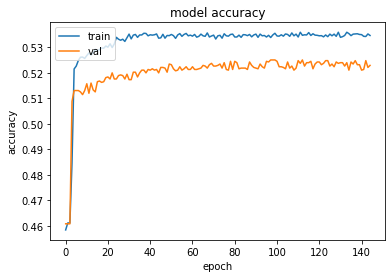

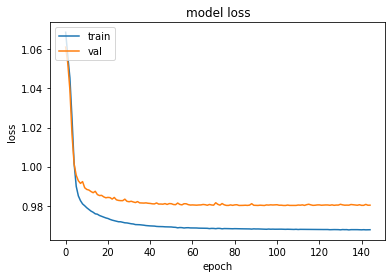

In [14]:
score = model01.evaluate(test_X01, test_y01, verbose=3)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

plt.plot(model01.history.history['accuracy'])
plt.plot(model01.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(model01.history.history['loss'])
plt.plot(model01.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Test Score: 0.9829795712774451
Test Accuracy: 0.5369318


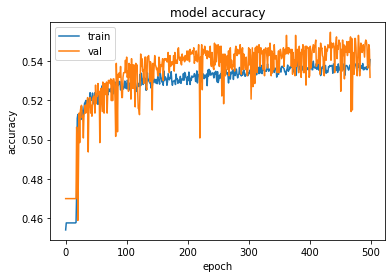

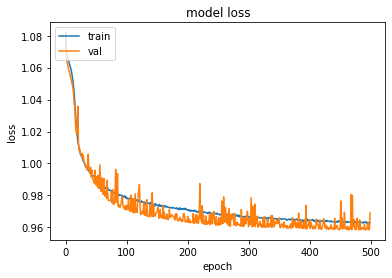

In [15]:
score = model02.evaluate(test_X02, test_y02, verbose=0)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

plt.plot(model02.history.history['accuracy'])
plt.plot(model02.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(model02.history.history['loss'])
plt.plot(model02.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Test Score: 0.9754355658184398
Test Accuracy: 0.5269886


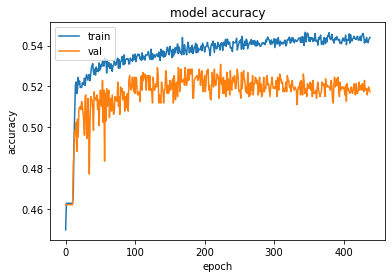

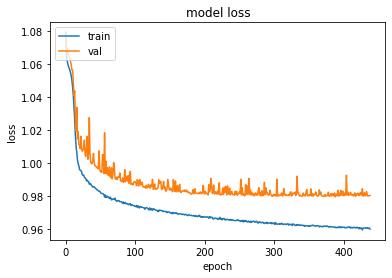

In [16]:
score = model03.evaluate(test_X03, test_y03, verbose=0)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

plt.plot(model03.history.history['accuracy'])
plt.plot(model03.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(model03.history.history['loss'])
plt.plot(model03.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


In [17]:
pred=model01.predict_proba(test_X01)
for i in range(len(test_X01)):
	print("X=%s, Predicted=%s" % (test_X01[i], pred[i]))

X=[0.04142191 0.11722672 0.1489023  0.18951202 0.02707315 0.05414629
 0.62268236 0.21658517 0.13536573 0.08121944 0.05414629 0.59560921
 0.32487775], Predicted=[0.14782421 0.24167274 0.610503  ]
X=[0.08037979 0.11183275 0.11183275 0.06989547 0.06989547 0.20968641
 0.24463415 0.45432056 0.06989547 0.10484321 0.17473868 0.45432056
 0.62905924], Predicted=[0.29346788 0.28867504 0.41785705]
X=[0.10734844 0.14313125 0.16698646 0.14313125 0.19084167 0.14313125
 0.47710418 0.47710418 0.04771042 0.19084167 0.23855209 0.19084167
 0.5248146 ], Predicted=[0.31860766 0.27988076 0.40151164]
X=[0.249488   0.14393539 0.06026095 0.15353108 0.15353108 0.07676554
 0.53735878 0.34544493 0.34544493 0.03838277 0.         0.57574155
 0.        ], Predicted=[0.6912308  0.20355444 0.10521475]
X=[0.0758098  0.09205476 0.06497983 0.08122479 0.08122479 0.10829972
 0.46027381 0.51442367 0.08122479 0.05414986 0.13537465 0.43319888
 0.51442367], Predicted=[0.36606017 0.27798417 0.35595563]
X=[0.14993702 0.14993702 

 0.46471222], Predicted=[0.07698748 0.17175001 0.7512626 ]
X=[0.19408895 0.12939264 0.03622994 0.07763558 0.02587853 0.15527116
 0.25878527 0.38817791 0.18114969 0.05175705 0.02587853 0.75047729
 0.31054233], Predicted=[0.64099586 0.22489463 0.13410959]
X=[0.05024941 0.10892213 0.13070656 0.11618361 0.0580918  0.11618361
 0.43568853 0.37759673 0.08713771 0.0580918  0.14522951 0.40664263
 0.63900985], Predicted=[0.20547079 0.26778513 0.526744  ]
X=[0.0666707  0.13662028 0.1457283  0.1457283  0.07286415 0.1457283
 0.54648112 0.51004905 0.10929622 0.07286415 0.18216037 0.32788867
 0.4371849 ], Predicted=[0.22334766 0.28256026 0.49409205]
X=[0.06341323 0.1128822  0.13280259 0.23240453 0.03320065 0.06640129
 0.66401293 0.36520711 0.13280259 0.13280259 0.06640129 0.39840776
 0.36520711], Predicted=[0.22643547 0.2692443  0.50432026]
X=[0.08332604 0.09026988 0.06610532 0.22220277 0.02777535 0.02777535
 0.63883297 0.22220277 0.19442743 0.08332604 0.         0.63883297
 0.13887673], Predicted=[0

 0.4228807 ], Predicted=[0.35691273 0.27741852 0.36566874]
X=[0.03710538 0.17258317 0.34516634 0.14381931 0.08629158 0.05752772
 0.51774951 0.40269406 0.05752772 0.11505545 0.11505545 0.34516634
 0.48898565], Predicted=[0.05777892 0.14207484 0.8001462 ]
X=[0.06162109 0.12122182 0.14142545 0.06734545 0.10101818 0.16836363
 0.40407272 0.63978181 0.13469091 0.06734545 0.13469091 0.43774545
 0.33672727], Predicted=[0.21826984 0.28759557 0.49413455]
X=[0.0732929  0.12459793 0.13742419 0.18323226 0.03664645 0.1465858
 0.43975741 0.51305031 0.0732929  0.0732929  0.21987871 0.29317161
 0.54969677], Predicted=[0.27914804 0.28902847 0.43182352]
X=[0.07708231 0.13874816 0.13489404 0.23124693 0.03854115 0.11562346
 0.53957616 0.30832924 0.19270577 0.03854115 0.15416462 0.38541155
 0.53957616], Predicted=[0.24506307 0.27687338 0.4780636 ]
X=[0.0636772  0.12514595 0.19324006 0.14723052 0.11042289 0.11042289
 0.4784992  0.4784992  0.14723052 0.11042289 0.11042289 0.4784992
 0.40488394], Predicted=[0.

 0.17582176], Predicted=[0.12403445 0.21509908 0.66086644]
X=[0.07835721 0.11753582 0.11575497 0.07123383 0.03561692 0.24931841
 0.32055224 0.64110447 0.10685075 0.10685075 0.14246766 0.35616915
 0.4630199 ], Predicted=[0.26923528 0.30235526 0.4284094 ]
X=[0.06011543 0.09383872 0.11143348 0.0879738  0.0293246  0.17594759
 0.29324599 0.52784278 0.0293246  0.0586492  0.20527219 0.26392139
 0.67446578], Predicted=[0.27689597 0.28956595 0.43353805]
X=[0.01928602 0.27551462 0.47755868 0.16530877 0.01836764 0.
 0.69797037 0.18367641 0.07347057 0.01836764 0.09183821 0.23877934
 0.27551462], Predicted=[0.0227622  0.08148355 0.8957542 ]
X=[0.05857113 0.09714236 0.09999949 0.11428513 0.14285641 0.02857128
 0.39999796 0.31428411 0.14285641 0.05714257 0.08571385 0.57142566
 0.57142566], Predicted=[0.26271263 0.27224785 0.46503952]
X=[0.10622295 0.11992914 0.07538403 0.23985828 0.03426547 0.06853094
 0.5482475  0.27412375 0.20559281 0.10279641 0.03426547 0.61677844
 0.30838922], Predicted=[0.384243

 0.63045769], Predicted=[0.20650876 0.27249074 0.52100056]
X=[0.0523851  0.09199334 0.08943797 0.07666112 0.05110741 0.12776853
 0.45996672 0.53662784 0.02555371 0.07666112 0.15332224 0.33219819
 0.56218155], Predicted=[0.28256842 0.28204763 0.43538392]
X=[0.08400257 0.10578102 0.07778016 0.09333619 0.06222413 0.15556032
 0.37334476 0.62224127 0.09333619 0.09333619 0.12444825 0.43556889
 0.43556889], Predicted=[0.3654161  0.28943843 0.34514546]
X=[0.04447488 0.12354134 0.26252535 0.18531201 0.12354134 0.
 0.55593603 0.12354134 0.18531201 0.         0.12354134 0.5250507
 0.46328003], Predicted=[0.08526216 0.18419448 0.73054343]
X=[0.06935486 0.09649372 0.09649372 0.12061715 0.03015429 0.15077144
 0.48246859 0.60308574 0.09046286 0.06030857 0.15077144 0.39200573
 0.39200573], Predicted=[0.30746332 0.29337487 0.39916182]
X=[0.16060417 0.12205917 0.05364179 0.0963625  0.0963625  0.12848334
 0.32120835 0.25696668 0.25696668 0.         0.06424167 0.80302087
 0.19272501], Predicted=[0.5576327

In [18]:
pred=model02.predict_proba(test_X02)
for i in range(len(test_X02)):
	print("X=%s, Predicted=%s" % (test_X02[i], pred[i]))

X=[0.01072713 0.01294653 0.00943247 0.00369901 0.01109703 0.02219405
 0.03329108 0.06658216 0.3292118  0.17015442 0.46237613 0.24043559
 0.01109703 0.01849505 0.00739802 0.07398018 0.05548514 0.45867712
 0.27002766 0.46607514 0.27372667], Predicted=[0.37743077 0.29455894 0.32801038]
X=[0.01731805 0.012469   0.00599205 0.01385444 0.         0.02078166
 0.0311725  0.05888138 0.44680579 0.21128026 0.4814419  0.2251347
 0.02078166 0.00346361 0.01039083 0.06580861 0.04502694 0.3532883
 0.20088943 0.48836912 0.23898914], Predicted=[0.54896146 0.25221032 0.19882824]
X=[0.01004534 0.01366166 0.01084897 0.01607254 0.01607254 0.00803627
 0.05223576 0.0562539  0.36163219 0.17277982 0.57057523 0.28528761
 0.02009068 0.00803627 0.01205441 0.06429017 0.05223576 0.4540493
 0.20894304 0.35761405 0.20090677], Predicted=[0.5206045  0.2649468  0.21444874]
X=[0.00779588 0.01151665 0.01204818 0.00708717 0.01063075 0.01771792
 0.03897942 0.06732808 0.26222517 0.10985108 0.55634259 0.33664042
 0.01417433 0.0

 0.23442088 0.45525214 0.23442088], Predicted=[0.03050538 0.11737019 0.8521244 ]
X=[0.02591138 0.01554683 0.00555244 0.00370163 0.00370163 0.029613
 0.03701625 0.08513738 0.36275927 0.18508126 0.44789665 0.22209751
 0.029613   0.         0.00740325 0.06292763 0.04071788 0.49971941
 0.26651702 0.4256869  0.25541214], Predicted=[0.59556115 0.24577226 0.1586666 ]
X=[0.00540544 0.01930513 0.0289577  0.01544411 0.01544411 0.00772205
 0.06177643 0.05019335 0.50965551 0.27027186 0.40926882 0.21235646
 0.01158308 0.01544411 0.01158308 0.06563745 0.0579154  0.38996369
 0.2316616  0.4208519  0.23552262], Predicted=[0.15622263 0.24307416 0.6007032 ]
X=[0.0093734  0.01406009 0.01448616 0.0127819  0.00852127 0.02130317
 0.08947333 0.06817015 0.48571235 0.24285618 0.51127616 0.27268062
 0.02982444 0.0127819  0.         0.08947333 0.01704254 0.35789331
 0.17042539 0.39623902 0.17894666], Predicted=[0.3065174  0.28071296 0.4127696 ]
X=[0.01089032 0.01310872 0.01048697 0.01613381 0.         0.02420071


In [19]:
pred=model03.predict_proba(test_X03)
for i in range(len(test_X03)):
	print("X=%s, Predicted=%s" % (test_X03[i], pred[i]))

X=[0.0377756  0.0188878  0.0058762  0.01678916 0.00839458 0.01678916
 0.04617018 0.06295934 0.30220481 0.17208885 0.48268824 0.25183734
 0.02938102 0.00839458 0.00419729 0.08814307 0.02098645 0.6128042
 0.31479668 0.26442921 0.14270783 0.00239012 0.0011261  0.00218989
 0.00104932 0.00215614 0.00117524 0.0022652  0.00061725], Predicted=[0.7499846  0.16203308 0.08798221]
X=[0.00486993 0.02637877 0.06087409 0.03652445 0.         0.00405827
 0.10551509 0.05681582 0.50322582 0.23132155 0.38959418 0.18668055
 0.00811655 0.01217482 0.02029136 0.04869927 0.05681582 0.43423518
 0.18262227 0.45046828 0.23537982 0.0018655  0.00185114 0.00194459
 0.00123513 0.00170675 0.00108221 0.00212054 0.00097958], Predicted=[0.0348303  0.11385813 0.8513116 ]
X=[0.02824037 0.01737869 0.00664735 0.02172336 0.01303402 0.00868934
 0.04779139 0.03910205 0.4214332  0.19985492 0.36929713 0.17378689
 0.03041271 0.00434467 0.00868934 0.10427213 0.03475738 0.56046271
 0.25199099 0.41274386 0.22157828 0.00206036 0.00103

 6.00213031e-04], Predicted=[0.31681165 0.26919037 0.41399807]
X=[0.00739979 0.01162824 0.01233298 0.00704742 0.01409484 0.01409484
 0.05285564 0.05637935 0.36646577 0.16913805 0.53560381 0.26075449
 0.00352371 0.01409484 0.01761855 0.04933193 0.08809273 0.31008642
 0.14447208 0.53560381 0.24665965 0.00162633 0.00110116 0.00171549
 0.00076188 0.00164173 0.00120322 0.00162276 0.00125847], Predicted=[0.26342148 0.28017554 0.45640293]
X=[0.00625838 0.01636178 0.02454267 0.02045222 0.00818089 0.01227133
 0.07362801 0.07362801 0.43358716 0.22497447 0.47449161 0.19225091
 0.01227133 0.00818089 0.02045222 0.04090445 0.07362801 0.44176805
 0.21679358 0.44176805 0.20452225 0.0021224  0.00133869 0.00165734
 0.00156655 0.00200735 0.00077178 0.00189372 0.00147256], Predicted=[0.1596471  0.23624106 0.60411173]
X=[8.01636855e-03 1.29043981e-02 1.40775253e-02 2.34625421e-02
 3.91042368e-03 1.17312710e-02 5.08355079e-02 3.51938131e-02
 3.75400673e-01 1.52506524e-01 5.74832281e-01 3.12833895e-01
 1.564

 0.00076825 0.00194241 0.00103546 0.00198464 0.00114369], Predicted=[0.2217151  0.2646462  0.51363873]
X=[0.0146979  0.00676877 0.0146979  0.02320721 0.00386787 0.0116036
 0.06188588 0.04254654 0.49508704 0.22820418 0.34810808 0.13924323
 0.02707507 0.00386787 0.00773574 0.06962162 0.04254654 0.46027623
 0.25141139 0.46801197 0.23207205 0.00178285 0.00104891 0.00154715
 0.00118185 0.0021127  0.0010711  0.00191795 0.00070911], Predicted=[0.2735081  0.27146944 0.4550224 ]
X=[0.00543854 0.0267469  0.0534938  0.03120472 0.00891563 0.00445782
 0.08915633 0.04457817 0.50373327 0.267469   0.46361292 0.22734865
 0.00891563 0.01783127 0.01783127 0.04457817 0.05795162 0.35662533
 0.16939703 0.44132384 0.19168611 0.00236698 0.00148594 0.00218604
 0.00087408 0.00211746 0.00117311 0.00193622 0.00134771], Predicted=[0.03911279 0.12290491 0.8379823 ]
X=[0.00932369 0.01268021 0.01044253 0.02983579 0.         0.00745895
 0.07831895 0.02983579 0.4736432  0.25360423 0.3020874  0.14544949
 0.02237684 0.00